### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [30]:
import pandas as pd


marketing_campaign_df = pd.read_csv('csv/marketing_campaign.csv', sep="\t")

marketing_campaign_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [31]:
marketing_campaign_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [32]:
marketing_campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [33]:
marketing_campaign_df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [34]:
# We have only one column with null values - Income.
# I will use my helper function for numeric column to impute values into this column.


%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os
modules_path = os.path.abspath("../modules")
if modules_path not in sys.path:
    sys.path.append(modules_path)

from helper_functions import HelperFunctions

marketing_campaign_df = HelperFunctions.impute_numeric_data(
    marketing_campaign_df, 'Income', 'median'
)

marketing_campaign_df.isnull().sum().sort_values(ascending=False)


ID                     0
NumDealsPurchases      0
Z_Revenue              0
Z_CostContact          0
Complain               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
MntGoldProds           0
Year_Birth             0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Response               0
dtype: int64

I**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [41]:
marketing_campaign_df = HelperFunctions.process_categorical_data_for_clusterization(marketing_campaign_df, 'Education', 'low-cardinality')
marketing_campaign_df = HelperFunctions.process_categorical_data_for_clusterization(marketing_campaign_df, 'Marital_Status', 'low-cardinality')
marketing_campaign_df = HelperFunctions.process_categorical_data_for_clusterization(marketing_campaign_df, 'Year_Birth', 'mid-high-cardinality')
marketing_campaign_df = HelperFunctions.process_date_for_clusterization(marketing_campaign_df, 'Dt_Customer', '%d-%m-%Y')
marketing_campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   int64  
 1   Income                   2240 non-null   float64
 2   Kidhome                  2240 non-null   int64  
 3   Teenhome                 2240 non-null   int64  
 4   Recency                  2240 non-null   int64  
 5   MntWines                 2240 non-null   int64  
 6   MntFruits                2240 non-null   int64  
 7   MntMeatProducts          2240 non-null   int64  
 8   MntFishProducts          2240 non-null   int64  
 9   MntSweetProducts         2240 non-null   int64  
 10  MntGoldProds             2240 non-null   int64  
 11  NumDealsPurchases        2240 non-null   int64  
 12  NumWebPurchases          2240 non-null   int64  
 13  NumCatalogPurchases      2240 non-null   int64  
 14  NumStorePurchases       

In [39]:
marketing_campaign_df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Birth_freq
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.024183
std,3246.662198,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.009164
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000446
25%,2828.250000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.018750
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.022768
75%,8427.750000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.033036
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,0.039732


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [47]:
from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Prepare features
X = marketing_campaign_df.copy()

# # drop ID column
if 'ID' in X.columns:
    X = X.drop('ID', axis=1)

# 2. KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# 3. Silhouette score
score = silhouette_score(X, labels)
print(f"Silhouette score for KMeans with 3 clusters: {score}")

Silhouette score for KMeans with 3 clusters: 0.5378525256268858


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [50]:
from sklearn.decomposition import PCA
import plotly.express as px

features = [
    "Income", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
    "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases",
    "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"
]

# PCA to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Prepare DataFrame for Plotly
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"])
pca_df["Cluster"] = labels.astype(str)

# 3D Plot
fig = px.scatter_3d(pca_df, x="PC1", y="PC2", z="PC3", color="Cluster",
                    title="3D Visualization of KMeans Clusters")
fig.show()

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

score = silhouette_score(X_scaled, labels)
print(f"Silhouette score for KMeans with 3 clusters with scaled data: {score}")

Silhouette score for KMeans with 3 clusters with scaled data: 0.1317829918020187


As we saw, silhouette score for unscaled data was better, so we can make an assumption, that model performed better on unscaled data.
We should not scale your features before clustering in this case.
It is so because the original feature magnitudes likely carry meaningful weight (e.g. Income and Purchases are naturally more important and scaling flattened them).

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [51]:
features = [
    "Income", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
    "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases",
    "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"
]

# PCA to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Prepare DataFrame for Plotly
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"])
pca_df["Cluster"] = labels.astype(str)

# 3D Plot
fig = px.scatter_3d(pca_df, x="PC1", y="PC2", z="PC3", color="Cluster",
                    title="3D Visualization of KMeans Clusters")
fig.show()

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

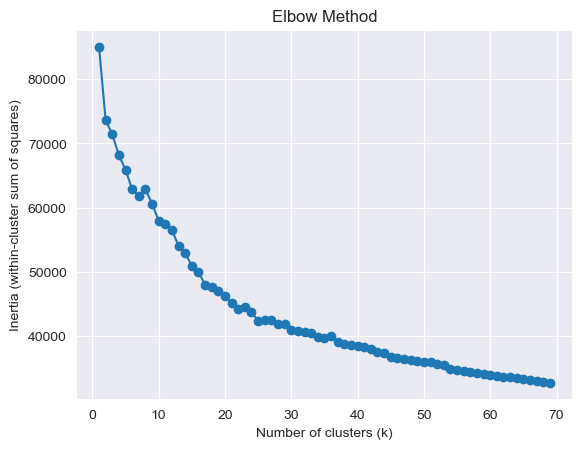

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# # 1. Define your feature list
# features = [
#     "Income", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
#     "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases",
#     "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"
# ]

X = marketing_campaign_df.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
k_range = range(1, 70)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.grid(True)
plt.show()

In [58]:
# Train KMeans with k=10
kmeans_10 = KMeans(n_clusters=10, random_state=42)
labels_10 = kmeans_10.fit_predict(X_scaled)

# Evaluate with Silhouette Score
silhouette_k10 = silhouette_score(X_scaled, labels_10)
print(f"Silhouette Score for KMeans with 10 clusters: {silhouette_k10:.4f}")

Silhouette Score for KMeans with 10 clusters: 0.0513


**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

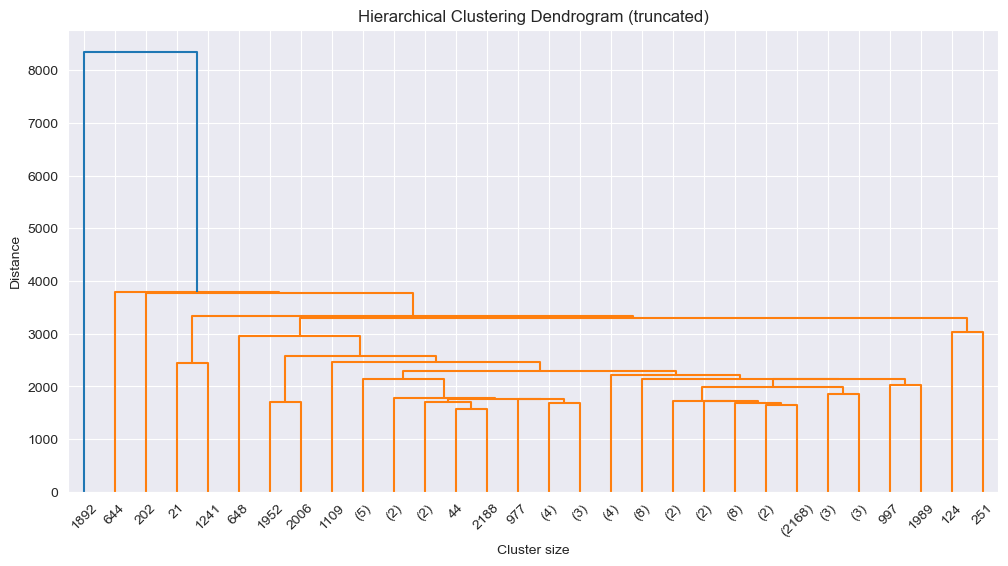

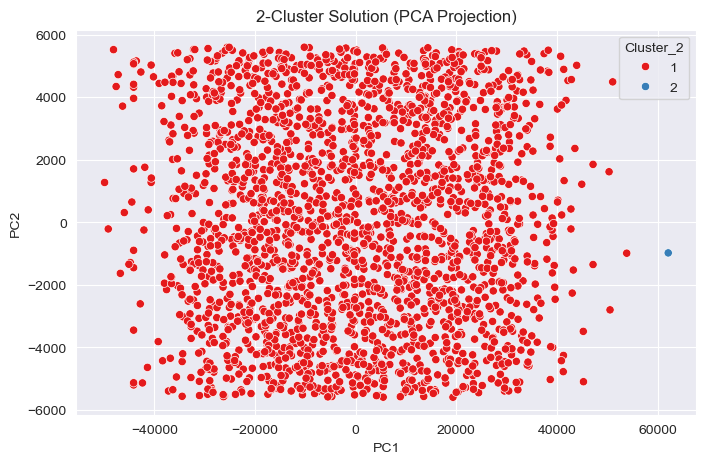

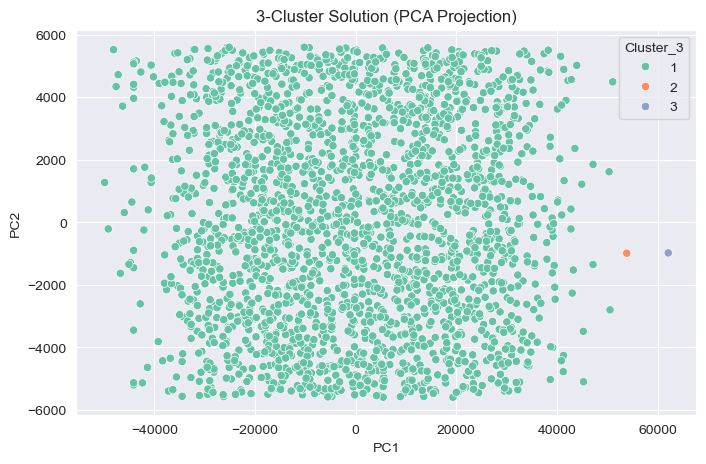

Silhouette Score (2 clusters): 0.538
Silhouette Score (3 clusters): 0.538


In [60]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
from sklearn.utils import resample

numeric_df = marketing_campaign_df.select_dtypes(include=['int64', 'float64']).copy()

# Remove outliers in Income
q1 = numeric_df["Income"].quantile(0.25)
q3 = numeric_df["Income"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

numeric_df = numeric_df[(numeric_df["Income"] >= lower_bound) & (numeric_df["Income"] <= upper_bound)]

# Linkage matrix using 'single' linkage on unscaled data
linkage_matrix = linkage(numeric_df, method='single')

# Plot dendrogram with truncate_mode
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# Create flat clusters with 2 and 3 clusters
clusters_2 = fcluster(linkage_matrix, t=2, criterion='maxclust')
clusters_3 = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Visualize clusters in 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(numeric_df)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster_2"] = clusters_2
df_pca["Cluster_3"] = clusters_3

# Plot for 2 clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster_2", palette="Set1")
plt.title("2-Cluster Solution (PCA Projection)")
plt.grid(True)
plt.show()

# Plot for 3 clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster_3", palette="Set2")
plt.title("3-Cluster Solution (PCA Projection)")
plt.grid(True)
plt.show()

# Silhouette Score on SAMPLE (to avoid memory issues)
sample_X, sample_labels_2 = resample(numeric_df, clusters_2, n_samples=500, random_state=42)
_, sample_labels_3 = resample(numeric_df, clusters_3, n_samples=500, random_state=42)

silhouette_2 = silhouette_score(sample_X, sample_labels_2)
silhouette_3 = silhouette_score(sample_X, sample_labels_3)

print(f"Silhouette Score (2 clusters): {silhouette_2:.3f}")
print(f"Silhouette Score (3 clusters): {silhouette_3:.3f}")

As I can see, both clusterisations shown better results than KMeans with 3 clusters on unscaled data.

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мертрику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

Unique labels found: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1}
Points marked as noise: 889
Silhouette Score (DBSCAN): 0.100


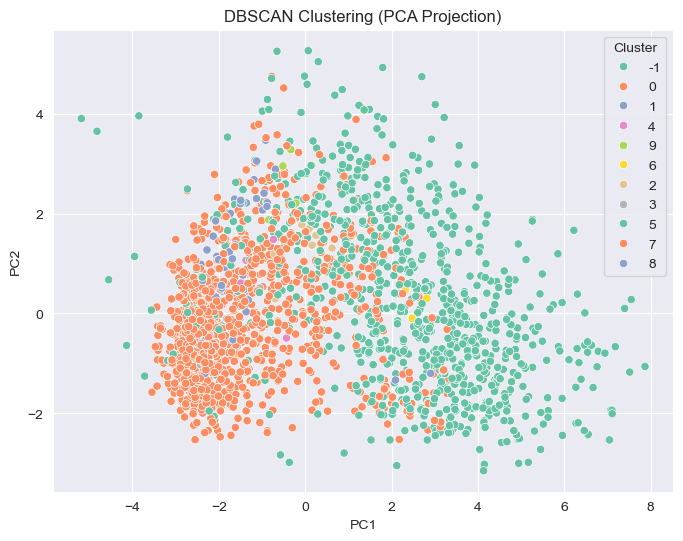

In [63]:
from sklearn.cluster import DBSCAN

# 1. Drop NaNs and select numeric features
X = marketing_campaign_df.select_dtypes(include=['float64', 'int64']).dropna()

# 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Try DBSCAN with adjusted params
dbscan = DBSCAN(eps=2.5, min_samples=5)  # try increasing eps
labels = dbscan.fit_predict(X_scaled)

# 4. Evaluate and visualize
filtered = labels != -1
print("Unique labels found:", set(labels))
print("Points marked as noise:", sum(labels == -1))

if len(set(labels[filtered])) > 1:
    silhouette = silhouette_score(X_scaled[filtered], labels[filtered])
    print(f"Silhouette Score (DBSCAN): {silhouette:.3f}")
else:
    print("Too few clusters to calculate silhouette score.")

# 5. PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = labels.astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="Set2")
plt.title("DBSCAN Clustering (PCA Projection)")
plt.grid(True)
plt.show()

This clusterization is worse than kMeans, so I would prefer to use kMeans instead of it.